In [11]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as spla
import qutip

In [12]:
# Operators.
σx = qutip.Qobj([[0,1],[1,0]])
σy = qutip.Qobj([[0,-1j],[1j,0]])
σz = qutip.Qobj([[1,0],[0,-1]])
ide = qutip.Qobj(np.eye(2))
σp = (σx + 1j * σy)/2
σm = σp.dag()

# Model parameters.
δ = 1.
Ω = 1.
Γ = 0.1

# Simulation parameters.
number_trajectories = 1000
dt = 0.1
t_final = 50

H = - δ * σm.dag() * σm + Ω/2. * (σm.dag() + σm)

M = np.sqrt(Γ) * σm
M_l = [M]

ψ0 = qutip.Qobj([[1],[0]])

t_range = np.arange(0, t_final, dt)

In [13]:
result = qutip.mcsolve(H, ψ0, t_range, M_l, [], ntraj=number_trajectories)

10.0%. Run time:   0.88s. Est. time left: 00:00:00:07
20.0%. Run time:   1.68s. Est. time left: 00:00:00:06
30.0%. Run time:   2.43s. Est. time left: 00:00:00:05
40.0%. Run time:   3.19s. Est. time left: 00:00:00:04
50.0%. Run time:   3.76s. Est. time left: 00:00:00:03
60.0%. Run time:   4.32s. Est. time left: 00:00:00:02
70.0%. Run time:   4.84s. Est. time left: 00:00:00:02
80.0%. Run time:   5.41s. Est. time left: 00:00:00:01
90.0%. Run time:   5.93s. Est. time left: 00:00:00:00
100.0%. Run time:   6.46s. Est. time left: 00:00:00:00
Total run time:   6.48s


In [14]:
print(result.col_times[3])

[18.36456552 31.49939474 47.15819828 48.75987843]


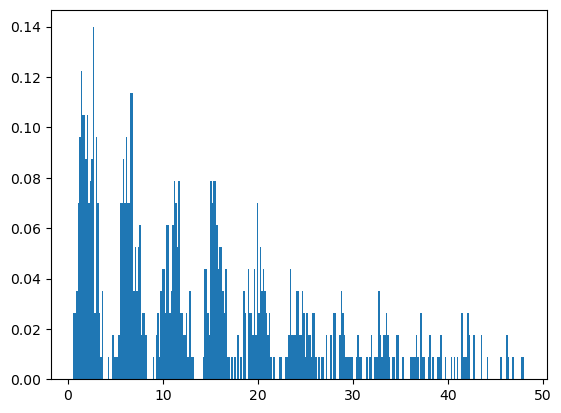

In [15]:
# Builds the plot of the waiting time distribution.
v_wtd = []
for trajectory in range(number_trajectories):
    for j in range(1, len(result.col_times[trajectory])):
        difference = result.col_times[trajectory][j] - result.col_times[trajectory][j-1]
        v_wtd.append(difference)
        
# print(v_wtd)
plt.hist(v_wtd, bins=300, density=True)
plt.show()

In [16]:
def theoretical_wtd(τ, Ω, Γ):
    λ = np.sqrt(Ω**2 - (Γ/2.)**2) / 2.
    return (Ω / 2. * λ)**2 * (np.sin(λ * τ))**2 * np.exp(- Γ * τ / 2.)

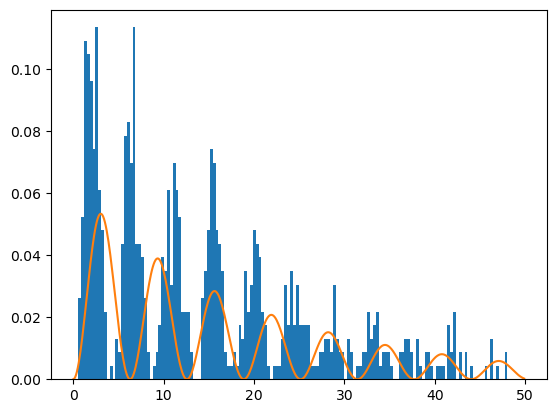

In [17]:
v_theo_wtd = []
for t in t_range:
    theo_wtd = theoretical_wtd(t, Ω, Γ)
    v_theo_wtd.append(theo_wtd)

plt.hist(v_wtd, bins=150, density=True)
plt.plot(t_range, v_theo_wtd)
    
plt.show()